# MODELAGEM DE DISPERSÃO
Neste notebook vamos implementar um modelo de dispersão gaussiano.

In [1]:
# Criando uma função do modelo gaussiano
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

In [2]:
# Criando função da estimativa da dispersão lateral e vertical da pluma
def sigmaXY(x,classe,urbOrRural):
    if urbOrRural=='urbano':
        if (classe=='A') or (classe=='B'):
            sigmaY = 0.32*x*(1+0.0004*x)**(-0.5)
            sigmaZ = 0.24*x*(1+0.001*x)**(0.5)
        else:
            print('Classe de estabilidade errada')
    if urbOrRural=='rural':
        if (classe=='A') :
            sigmaY = 0.22*x*(1+0.0001*x)**(-0.5)
            sigmaZ = 0.20*x
        else:
            print('Classe de estabilidade errada. Fique ligado')
    return sigmaY,sigmaZ

In [3]:
# Utilizando a função do modelo gaussiano
qs = 100 # g/s
sigmaY = 10 # m
sigmaZ = 15 # m
u = 10 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
H = 50 # m

# Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H)

print("A concentração estimada é = " +str(conc) + ' [$\mu$]g/m³')

A concentração estimada é = 86.2052564132534 [$\mu$]g/m³


In [4]:
# Função para estimar o deltaH com base na equação de Davidson-Bryant
def deltaHdavidsonBryant(d,vs,u,Ts,Tamb):
    deltaH = (d*(vs/u)**(1.4))*(1+(Ts-Tamb)/Ts)
    return deltaH

In [5]:
# Utilizando a função do modelo gaussiano
qs = 100 # g/s
sigmaY = 10 # m
sigmaZ = 15 # m
u = 10 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
H = 50 # m

#Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H)

print("A concentração estimada é = " +str(conc) + ' [$\mu$]g/m³')

A concentração estimada é = 86.2052564132534 [$\mu$]g/m³


deltaH = 2.700592857381857
A pluma subiu


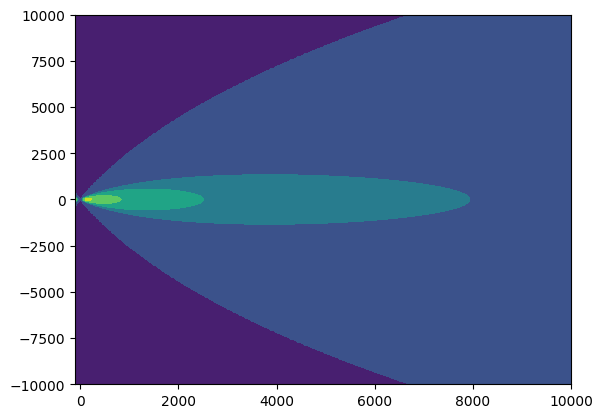

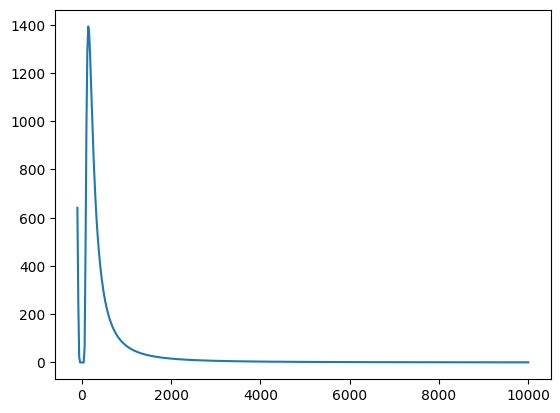

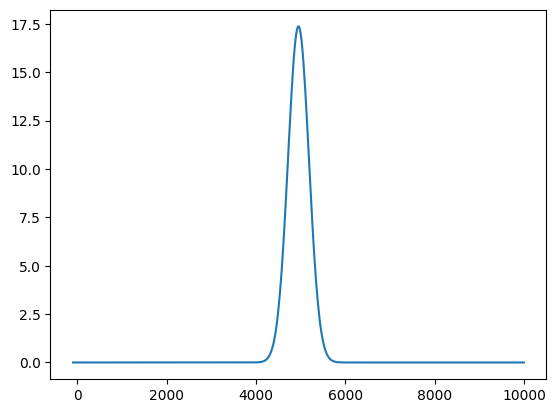

In [7]:
# Criando dominio de modelagem
x = np.linspace(-100,10000,500)
# print(x)
y = np.linspace(-10000,10000,500)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)
#print(xx.shape)


# Adotando inputs
classe = 'B'
urbOrRural = 'urbano' 
hg = 150 # m altura geométrica da chaminé
qs = 100 # g/s
sigmaY = 10 # m
sigmaZ = 15 # m
u = 5 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 300 # em Kelvin
Tamb = 293 # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
#print(sigmaY)

if vs>1.5*u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHdavidsonBryant(d,vs,u,Ts,Tamb)
    print('deltaH = '+str(deltaH))
    hef = hg+deltaH
    print('A pluma subiu')
else:
    hef = hg +2*d*((vs/u)-1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,H)

# Visualização dos resultados no espaço
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig,ax = plt.subplots()
ax.contourf(xx,yy,conc+0.1,norm = LogNorm())

# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])